## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [16]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice in the DataFrame.
df["Mouse ID"].nunique()

249

In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupDF = df[df.duplicated(["Mouse ID", "Timepoint"])]
dupDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
g9_df = df.loc[df["Mouse ID"] == "g989"]
g9_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropdup_df = df[df["Mouse ID"] != "g989"]


In [82]:
# Checking the number of mice in the clean DataFrame.
dropdup_df["Mouse ID"].nunique()

248

## Summary Statistics

In [117]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumorvolume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drugSt_gb = dropdup_df.groupby(["Drug Regimen"])
drugmean = drugSt_gb.mean()["Tumor Volume (mm3)"]
drugmedian = drugSt_gb.median()["Tumor Volume (mm3)"]
drugvar = drugSt_gb.var()["Tumor Volume (mm3)"]
drugstd = drugSt_gb.std()["Tumor Volume (mm3)"]
drugsem = drugSt_gb.sem()["Tumor Volume (mm3)"]


In [107]:
#sumtable
sum_table = pd.DataFrame({"Drug Regimen": drugs,
                         "Mean": drugmean,
                         "Median": drugmedian,
                          "Variance": drugvar,
                          "St Dev": drugstd,
                          "SEM": drugsem
                         })
sum_table.style.set_caption("Tumor Volume (mm3)")
sum_table.head()

,Drug Regimen,Mean,Median,Variance,St Dev,SEM
Drug Regimen,,,,,,
Capomulin,Ramicane,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,Capomulin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,Placebo,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,Ceftamin,54.331565,52.509285,66.173479,8.134708,0.596466


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
sum_table2 = drugSt_gb.agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
sum_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar Plots

In [246]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#Create DF
bardata = pd.DataFrame(drugSt_gb["Mouse ID"].count())
bardata = bardata.sort_values(by=["Mouse ID"], ascending = False)
bardata


,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


(100, 250)

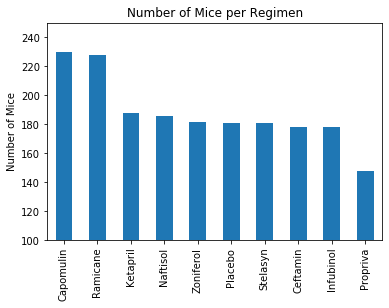

In [242]:
#Create barchart
ax = bardata.plot.bar(legend= False)
ax.set_xlabel("")
ax.set_ylabel("Number of Mice")
ax.set_title("Number of Mice per Regimen")
ax.set_ylim(100,250)

(100, 250)

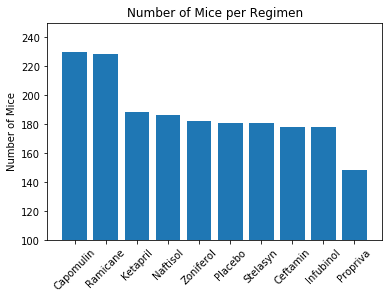

In [250]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
plt.bar(bardata.index, bardata["Mouse ID"])
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Regimen")
plt.xticks(rotation=45)
plt.ylim(100,250)


## Pie Plots

In [239]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Create DF
gender = pd.DataFrame(dropdup_df.groupby("Sex").count()["Mouse ID"])
gender

,Mouse ID
Sex,
Female,922
Male,958


Text(0.5, 1.0, 'Mice by Gender')

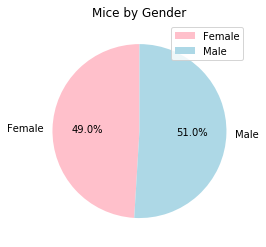

In [269]:
colors = ["pink", "lightblue"]
mousepie = gender.plot.pie(y= "Mouse ID", autopct='%1.1f%%', colors = colors, startangle = 90)
mousepie.set_ylabel("")
mousepie.set_title("Mice by Gender")


Text(0.5, 1.0, 'Mice by Gender')

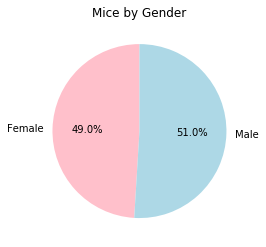

In [270]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender["Mouse ID"], labels=gender.index, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Mice by Gender")

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
